In [1]:
import cv2
import numpy as np
 
img = cv2.imread('./thresholded.jpg',0)

counter = 1

# apply water shed algorithm to the image
ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
sure_bg = cv2.dilate(opening,kernel,iterations=3)
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers+1
markers[unknown==255] = 0
markers = cv2.watershed(img,markers)
img[markers == -1] = [0,0,255]



error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\segmentation.cpp:161: error: (-215:Assertion failed) src.type() == CV_8UC3 && dst.type() == CV_32SC1 in function 'cv::watershed'


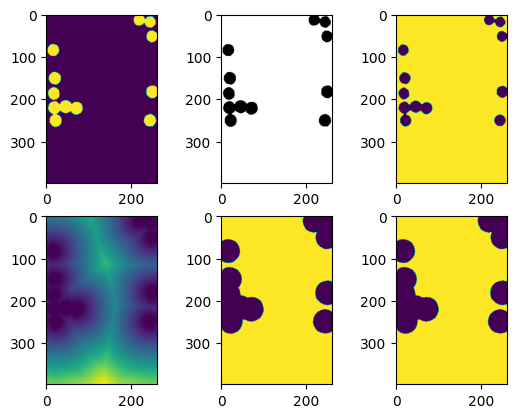

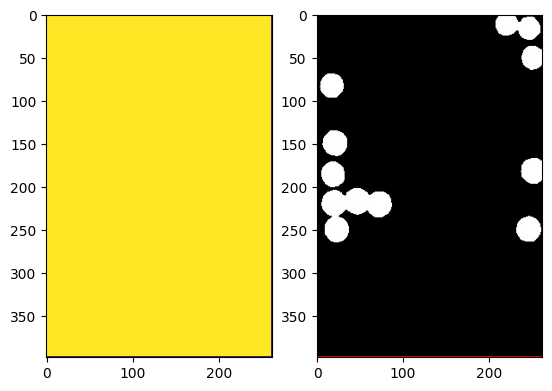

In [6]:
import cv2 as cv 
import matplotlib.pyplot as plt 
import numpy as np 
import os 

def watershed(): 
    imgRGB = cv.imread('./thresholded.jpg')
    img = cv.cvtColor(imgRGB,cv.COLOR_BGR2GRAY)  # Convert image to grayscale
    _,imgThreshold = cv.threshold(img,120,255,cv.THRESH_BINARY_INV)

    plt.figure()
    plt.subplot(231)
    plt.imshow(img)
    plt.subplot(232)
    plt.imshow(imgThreshold,cmap='gray')

    # imgThreshold = img

    kernel = np.ones((3,3),np.uint8)
    imgDilate = cv.morphologyEx(imgThreshold,cv.MORPH_DILATE,kernel)
    plt.subplot(233)
    plt.imshow(imgDilate)

    # computes distance from current pixel to nearest 0 pixel
    distTrans = cv.distanceTransform(imgDilate,cv.DIST_L2,5)
    plt.subplot(234)
    plt.imshow(distTrans)

    _,distThresh = cv.threshold(distTrans,15,255,cv.THRESH_BINARY)
    plt.subplot(235)
    plt.imshow(distThresh)

    distThresh = np.uint8(distThresh)
    _,labels = cv.connectedComponents(distThresh)
    plt.subplot(236)
    plt.imshow(labels)

    plt.figure() 
    plt.subplot(121)
    labels = np.int32(labels)
    labels = cv.watershed(imgRGB,labels)
    plt.imshow(labels)

    plt.subplot(122)
    imgRGB[labels==-1] = [255,0,0]
    plt.imshow(imgRGB)


    plt.show()     


if __name__ == '__main__': 
    watershed() 

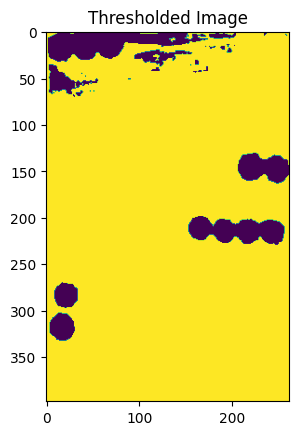

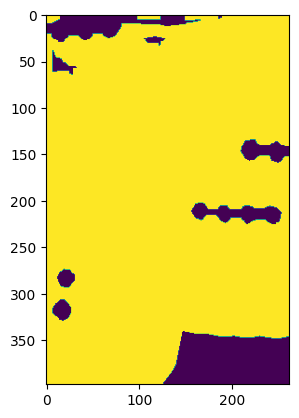

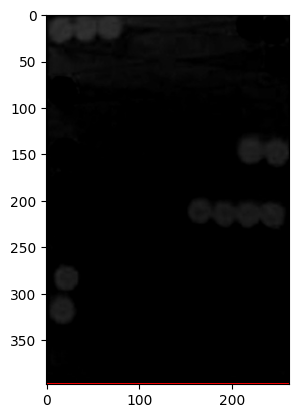

In [16]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

img = cv.imread('./red.jpg')
assert img is not None, "file could not be read, check with os.path.exists()"
# gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(img,150,200,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)

plt.figure()
plt.title('Thresholded Image')
plt.imshow(thresh)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

plt.figure()
plt.imshow(unknown)

# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]

plt.figure()
plt.imshow(img)


In [11]:
import cv2
import numpy as np

img = cv2.imread('./thresholded.jpg')

# calculate the eucledian distance map
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
invert = cv2.bitwise_not(gray)

cv2.imshow('Inverted Image', invert)
cv2.waitKey(0)

ret, thresh = cv2.threshold(invert, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
dist_map = cv2.distanceTransform(thresh, cv2.DIST_L2, 3)
cv2.normalize(dist_map, dist_map, 0, 1.0, cv2.NORM_MINMAX)

cv2.imshow('Distance Map', dist_map)
cv2.waitKey(0)

# find the ultimate eroded points
_, sure_fg = cv2.threshold(dist_map, 0.7*dist_map.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
cv2.imshow('Sure FG', sure_fg)

contours, _ = cv2.findContours(sure_fg, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for contour in contours:
    print(cv2.contourArea(contour))
filtered_contours = [
    contour for contour in contours if cv2.contourArea(contour) > 0 and cv2.contourArea(contour) < 200
]
centers = []
for contour in filtered_contours:
    moments = cv2.moments(contour)
    center = (
        int(moments["m10"] / moments["m00"]),
        int(moments["m01"] / moments["m00"]),
    )
    centers.append(center)

for center in centers:
    cv2.circle(img, center, 5, (0, 255, 0), -1)

cv2.imshow('Detected Points', img)

cv2.waitKey(0)
# save the result
cv2.imwrite('sure_fg.jpg', sure_fg)

cv2.destroyAllWindows()

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1555: error: (-2:Unspecified error) in function 'double __cdecl cv::threshold(const class cv::_InputArray &,const class cv::_OutputArray &,double,double,int)'
> THRESH_OTSU mode:
>     'src_type == CV_8UC1 || src_type == CV_16UC1'
> where
>     'src_type' is 16 (CV_8UC3)


: 